In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [4]:
df=pd.read_csv(r'F:\datasets\50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


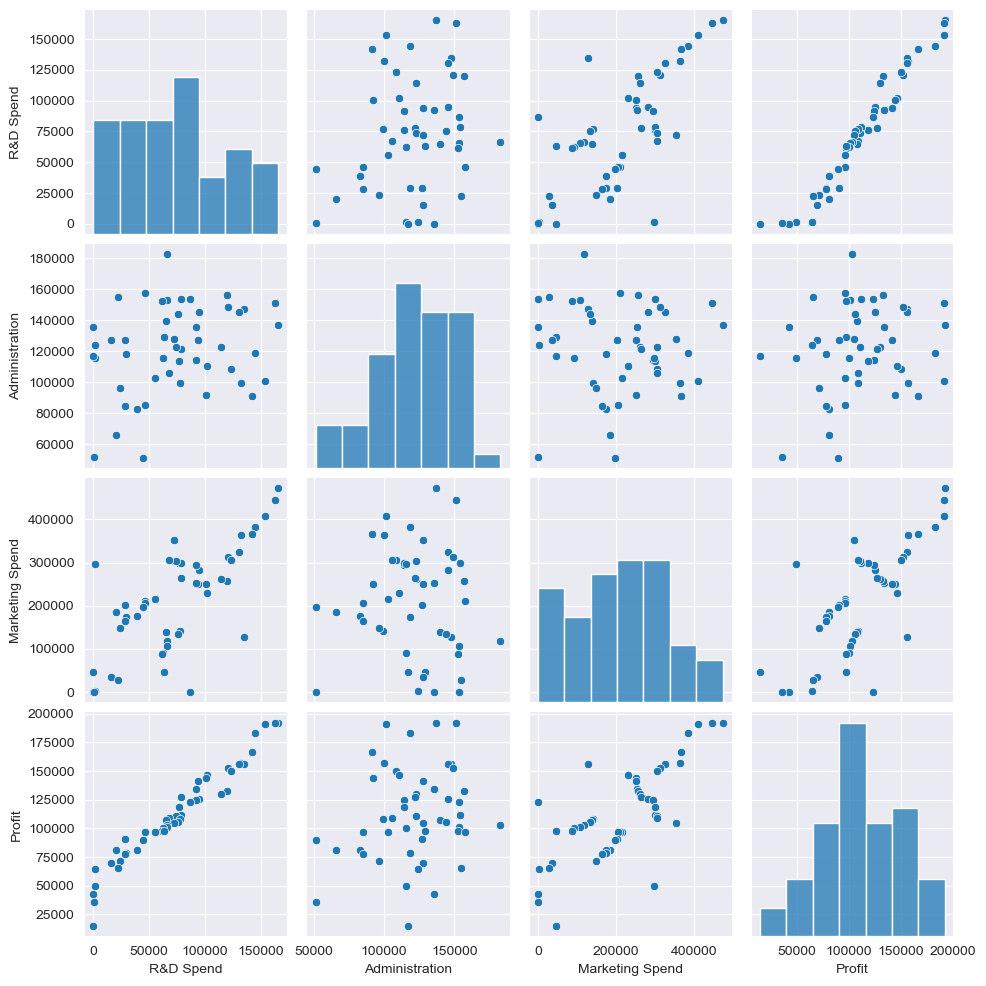

In [8]:
sns.pairplot(data=df)

In [9]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [11]:
df=pd.get_dummies(df,columns=['State'])

In [12]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [13]:
df.rename({'R&D Spend':'RDspend','Marketing Spend':'Markspend','State_California':'st_cal','State_Florida':'st_flo',
           'State_New York':'st_new'},axis=1,inplace=True)

<AxesSubplot:>

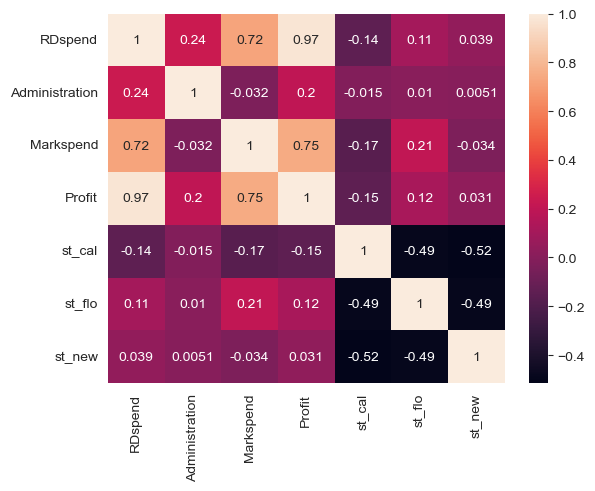

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
df.head()

,RDspend,Administration,Markspend,Profit,st_cal,st_flo,st_new
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [16]:
import statsmodels.formula.api as smf

In [17]:
model=smf.ols('Profit~RDspend+Administration+Markspend+st_cal+st_flo+st_new',data=df).fit()

In [18]:
model.rsquared,model.rsquared_adj

(0.9507524843355148, 0.945156175737278)

In [19]:
model1=smf.ols('Profit~RDspend+Administration+Markspend',data=df).fit()

In [20]:
model1.rsquared,model1.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [21]:
model1.pvalues

Intercept         1.057379e-09
RDspend           2.634968e-22
Administration    6.017551e-01
Markspend         1.047168e-01
dtype: float64

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
x=df.iloc[:,0:3]
x.head()

,RDspend,Administration,Markspend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [24]:
vif=pd.DataFrame()
vif['VIF_values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns)
                                                                       )]

In [25]:
vif['col']=x.columns
vif

,VIF_values,col
0,8.384571,RDspend
1,4.026406,Administration
2,7.593984,Markspend


In [26]:
model1.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [27]:
import statsmodels.api as sm

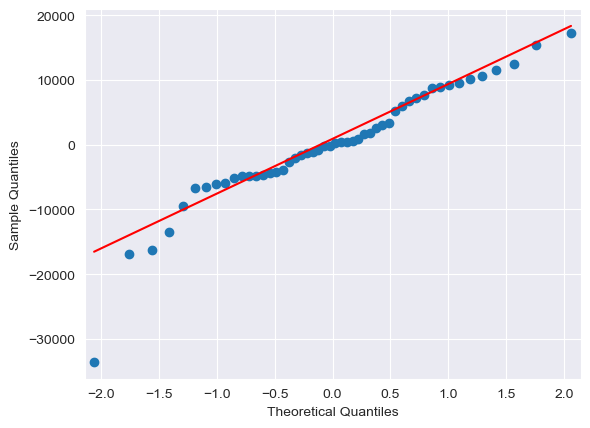

In [28]:
sm.qqplot(model1.resid,line='q');

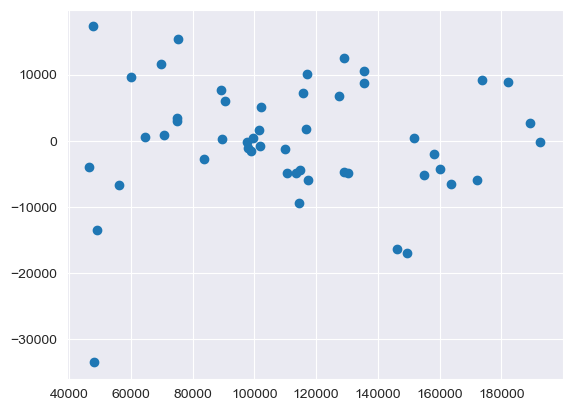

In [29]:
plt.scatter(model1.fittedvalues,model1.resid)

In [30]:
inf=model1.get_influence()

In [31]:
c,p=inf.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<StemContainer object of 3 artists>

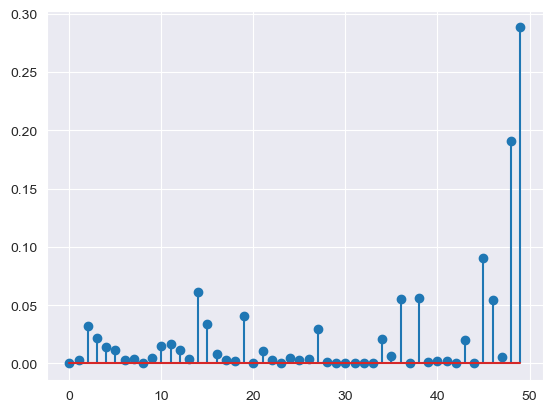

In [32]:
plt.stem(c)

In [33]:
np.argmax(c),np.max(c)

(49, 0.28808229275432673)

In [34]:
df.iloc[[49]]

,RDspend,Administration,Markspend,Profit,st_cal,st_flo,st_new
49,0.0,116983.8,45173.06,14681.4,1,0,0


In [35]:
from sklearn.preprocessing import OrdinalEncoder

In [38]:
df=pd.read_csv(r'F:\datasets\50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [39]:
cat_cols = df.select_dtypes(object).columns

In [40]:
oe = OrdinalEncoder()

In [41]:
df[cat_cols] = oe.fit_transform(df[cat_cols])

In [42]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2.0,192261.83
1,162597.70,151377.59,443898.53,0.0,191792.06
2,153441.51,101145.55,407934.54,1.0,191050.39
3,144372.41,118671.85,383199.62,2.0,182901.99
4,142107.34,91391.77,366168.42,1.0,166187.94


In [43]:
df['State'].value_counts()

2.0    17
0.0    17
1.0    16
Name: State, dtype: int64

In [44]:
df.rename({'R&D Spend':'RDspend','Marketing Spend':'Markspend'},axis=1,inplace=True)

In [45]:
model4=smf.ols('Profit~RDspend+Administration+Markspend+State',data=df).fit()

In [46]:
model4.rsquared,model4.rsquared_adj

(0.9507462044842656, 0.9463680893273114)

In [47]:
r2=pd.DataFrame(
{
    'model':['model','model1','model4'],
    'r2':[model.rsquared,model1.rsquared,model4.rsquared],
    'adj':[model.rsquared_adj,model1.rsquared_adj,model4.rsquared_adj]
})
r2

,model,r2,adj
0,model,0.950752,0.945156
1,model1,0.950746,0.947534
2,model4,0.950746,0.946368


In [48]:
from statsmodels.graphics.regressionplots import influence_plot

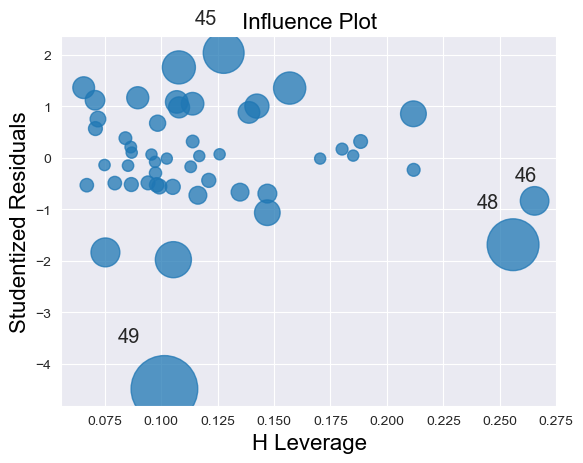

In [49]:
influence_plot(model);

In [50]:
#cutof 

k=len(df.columns)
n=len(df)

lev_cutoff=3*(k+1)/n
lev_cutoff

0.36

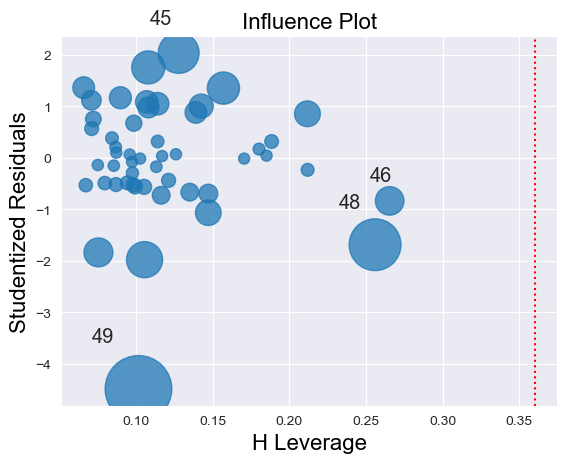

In [51]:
influence_plot(model);
plt.axvline(lev_cutoff,color='red',linestyle=':')

In [52]:
#max model accuracy is 
model.rsquared,model.rsquared_adj

(0.9507524843355148, 0.945156175737278)